In [1]:
import numpy as np
from tensorflow. keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = np.array(x_train, dtype=float)
x_train /= 255
x_test = np.array(x_test, dtype=float)
x_test /= 255

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(include_top=False)

In [3]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.layers import BatchNormalization
for layer in vgg.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False 

In [12]:
print(f'Ilość danych uczących: {x_train.shape[0]}')

max_samples = 10000
indices = np.random.choice(x_train.shape[0], max_samples, replace=False)
x_train_reduced = x_train[indices]
y_train_reduced = y_train[indices]

# Sprawdź ilość zmniejszonych danych uczących
print(f'Ilość zmniejszonych danych uczących: {x_train_reduced.shape[0]}')


Ilość danych uczących: 50000
Ilość zmniejszonych danych uczących: 10000


In [ ]:
from tensorflow.keras import Sequential
from tensorflow. keras.layers import Dense, Flatten, UpSampling2D
model = Sequential()
model.add(UpSampling2D((7,7)))

model.add(vgg)

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer='SGD', metrics = ['acc'])

model.fit(x_train, y_train, epochs = 10, 
          validation_data = (x_test, y_test))

Zadanie

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential


In [18]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical
import numpy as np
# Wczytanie danych
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_train_samples = 5000
num_test_samples = 1000

x_train = x_train[:num_train_samples]
y_train = y_train[:num_train_samples]
x_test = x_test[:num_test_samples]
y_test = y_test[:num_test_samples]

x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

x_train = np.array([np.repeat(np.repeat(x, 8, axis=0), 8, axis=1) for x in x_train])
x_test = np.array([np.repeat(np.repeat(x, 8, axis=0), 8, axis=1) for x in x_test])


x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


In [20]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:

history = model.fit(
    x_train, y_train,
    epochs=10,  
    batch_size=32,  
    validation_data=(x_test, y_test) 
)


Epoch 1/10
  5/157 ━━━━━━━━━━━━━━━━━━━━ 4:50 2s/step - accuracy: 0.1627 - loss: 2.8597

KeyboardInterrupt: 

In [ ]:
    
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Callback

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Wczytanie danych CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Przygotowanie danych
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Załadowanie modelu ResNet50 bez górnych warstw, używając wag z ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Zablokowanie treningu wszystkich warstw w modelu bazowym
for layer in base_model.layers:
    layer.trainable = False

# Dodanie warstw
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(100, activation='softmax')  # Zakładając, że mamy 100 klas
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ustawienie wczesnego zatrzymania
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Trenowanie modelu
history = model.fit(
    x_train, y_train,
    epochs=100,  # Maksymalna liczba epok
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Wypisanie liczby epok po których zatrzymano uczenie
print(f"Trening został zatrzymany po {len(history.history['loss'])} epokach.")


FunctionalAPI

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

inputs_x = Input(shape=(4,))  
x = Dense(32, activation='linear')(inputs_x)
x = Dense(2, activation='linear')(x)


In [28]:
encoder = Model(inputs_x, x)
encoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
inputs_b = Input(shape=(2,)) 
y = Dense(32, activation='linear')(inputs_b)
y = Dense(4, activation='linear')(y)
decoder = Model(inputs_b, y)
decoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
EN = Model(inputs_x, decoder(encoder(inputs_x)))
EN.compile(loss='mse', optimizer='adam')
EN.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_8 (Functional)       │ (None, 2)              │           226 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_12 (Functional)      │ (None, 4)              │           228 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454 (1.77 KB)

 Trainable params: 454 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytywanie zbioru danych Iris
data = load_iris()
X = data.data
y = data.target

# Podział na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
EN.fit(X, X, epochs=100, shuffle=True)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 20.7184
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9821 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0282 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.1446 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1305 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8718 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5006 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8448  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3870 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1335 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0644 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4604 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8192 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6340 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7122 
Epoch 16/100

In [39]:
Xt = encoder.predict(X)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


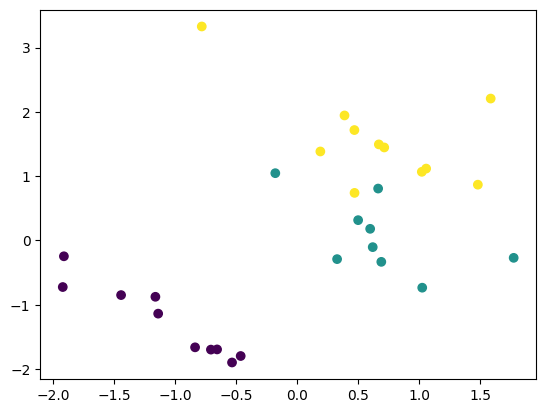

In [42]:
import matplotlib.pyplot as plt
plt.scatter(Xt[:,0], Xt[:,1], c=y_test)

Zadanie

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError


data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)


a = 1  
X_noisy = X + a * np.random.random(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X_noisy, X, test_size=0.2, random_state=42)


input_layer = Input(shape=(X.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


history = autoencoder.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.8928 - val_loss: 0.7369
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8154 - val_loss: 0.6847
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7532 - val_loss: 0.6361
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7817 - val_loss: 0.5908
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7104 - val_loss: 0.5493
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6402 - val_loss: 0.5106
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5348 - val_loss: 0.4752
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5441 - val_loss: 0.4425
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5369 - val_loss: 0.4128
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4672 - val_loss: 0.3854
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4557 - val_loss: 0.3606
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4099 - val_l

In [44]:

predicted = autoencoder.predict(X_test)


mse = MeanSquaredError()
mae = MeanAbsoluteError()
mse_value = mse(y_test, predicted).numpy()
mae_value = mae(y_test, predicted).numpy()

print(f'MSE: {mse_value}, MAE: {mae_value}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
MSE: 0.06469711661338806, MAE: 0.2043233960866928


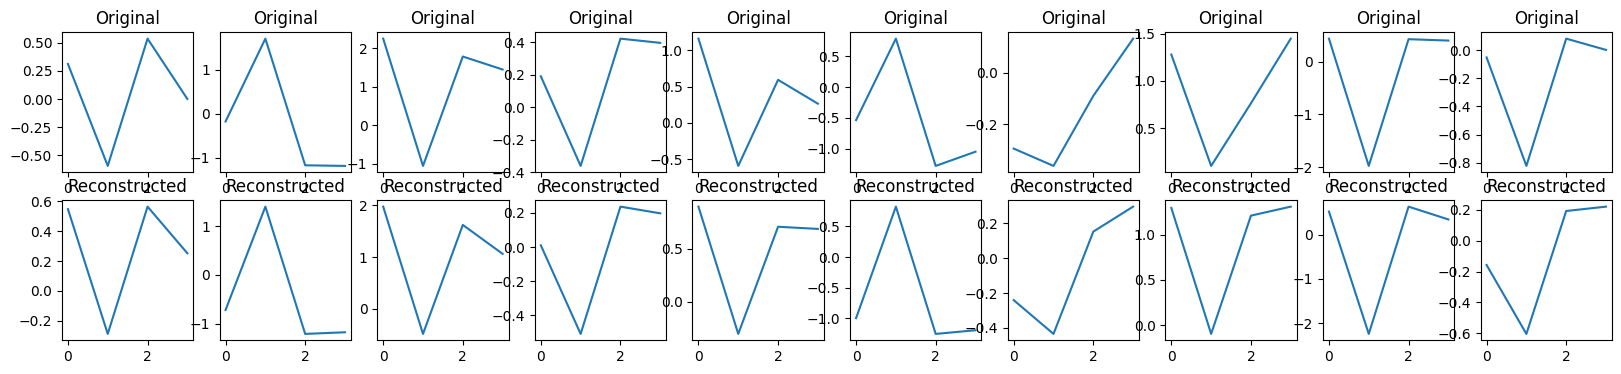

In [45]:

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.plot(y_test[i])
    plt.title("Original")
    plt.gray()
    
  
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(predicted[i])
    plt.title("Reconstructed")
    plt.gray()

plt.show()


Zadanie

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize


(x_train, _), (x_test, _) = mnist.load_data()


x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)


x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


In [47]:

noise_factor = 0.5


x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Dense, Reshape


input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(64, activation='relu')(x)


x = Dense(7 * 7 * 16, activation='relu')(encoded)
x = Reshape((7, 7, 16))(x)
x = Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


autoencoder.fit(x_train_noisy, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


autoencoder.save('autoencoder_mnist.h5')


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - loss: 0.0590 - val_loss: 0.0198
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0200 - val_loss: 0.0198
Epoch 3/25
171/235 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0200

KeyboardInterrupt: 

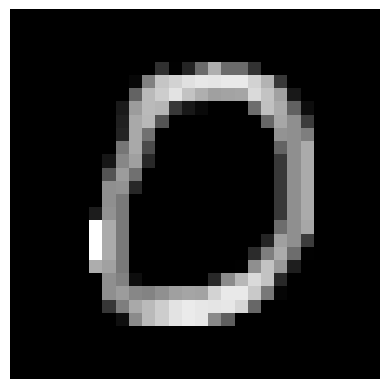

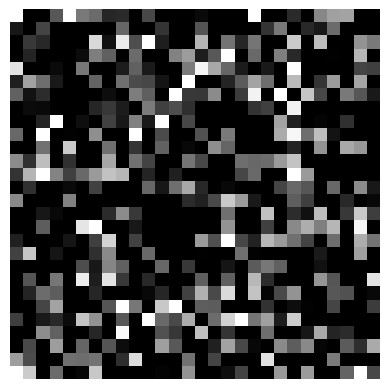

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


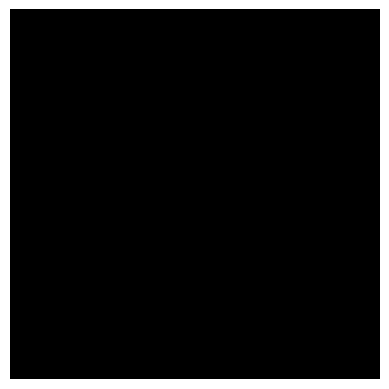

In [49]:
def show_image(image_num, dataset, show=True):
    img = dataset[image_num, :, :, 0]
    img = (img * 255).astype(np.uint8)
    if show:
        plt.figure()
        plt.axis('off')
        plt.imshow(img, interpolation='none', cmap='gray')
        plt.show()
        return
    return img


image_num = 10  
show_image(image_num, x_test, show=True)
show_image(image_num, x_test_noisy, show=True)


decoded_imgs = autoencoder.predict(x_test_noisy)
show_image(image_num, decoded_imgs, show=True)


In [50]:
def show_image(image_num, dataset, show=True):
    img = dataset[image_num].reshape((28, 28))  
    img = (img * 255).astype(np.uint8)  
    if not show:
        return img
    plt.figure()
    plt.axis('off')
    plt.imshow(img, interpolation='none', cmap='gray')
    plt.show()
    
def show_3_images(number, set1, set2, set3):
    fig = plt.figure(figsize=(9, 3))  
    ax = []
    
    img = show_image(number, set1, False)
    ax.append(fig.add_subplot(1, 3, 1)) 
    plt.axis('off')
    plt.imshow(img, interpolation='none', cmap='gray')
    
    img = show_image(number, set2, False)
    ax.append(fig.add_subplot(1, 3, 2))
    plt.axis('off')
    plt.imshow(img, interpolation='none', cmap='gray')
    
    img = show_image(number, set3, False)
    ax.append(fig.add_subplot(1, 3, 3))
    plt.axis('off')
    plt.imshow(img, interpolation='none', cmap='gray')
    
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


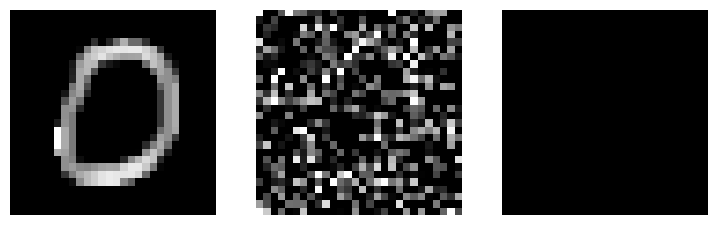

In [51]:

number = 10

decoded_imgs = autoencoder.predict(x_test_noisy)

show_3_images(number, x_test, x_test_noisy, decoded_imgs)
